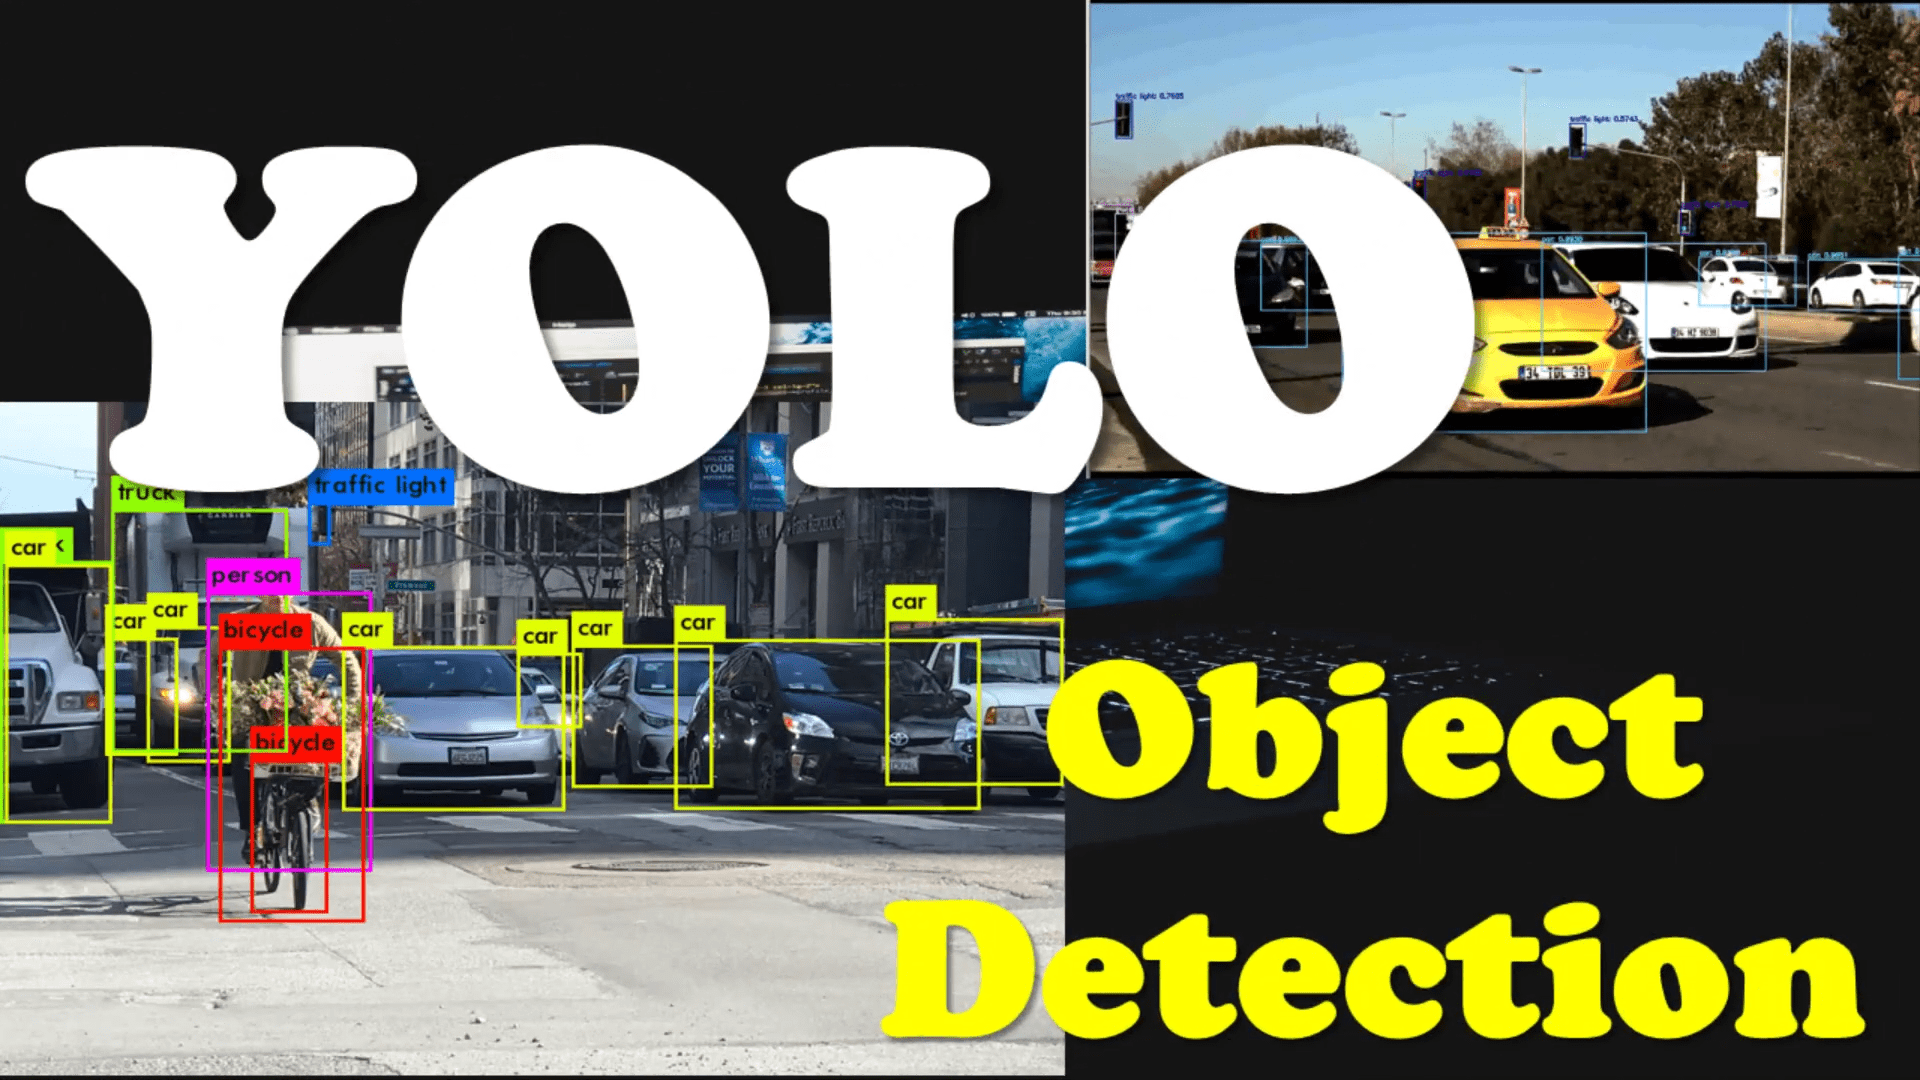

# Content
## 1. What is YOLO?
## 2. YOLO V10 Architecture
## 3. Inferencing using pre-trainned model
## 4. YOLO V10 model training on custom dataset

# 

# YOLO

### YOLO stands for "You Look at Once", It takes the entire image in a single instance and predicts the bounding box coordinates and class probabilities. The biggest advantage of using YOLO is its superb speed – it’s incredibly fast and can process 45 frames per second.

#### 1. YOLO first takes an input image:
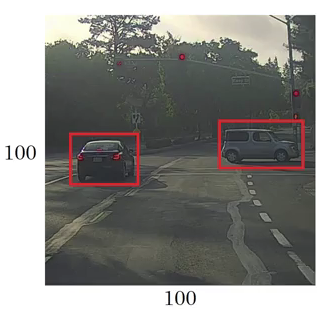

#### 2. The framework then divides the input image into grids (say a 3 X 3 grid):
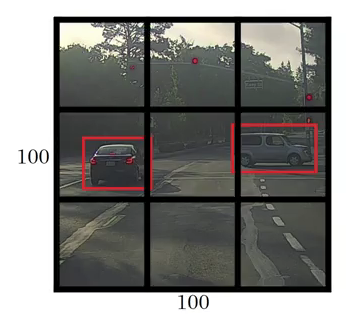

#### 3. Image classification and localization are applied on each grid. YOLO then predicts the bounding boxes and their corresponding class probabilities for objects (if any are found)

### If it found object in any grid then it returns an array for that particular grid : [class probability, center x, center y, hieght, width, class 1, class 2]

#

# YOLO V10 Model Architecture

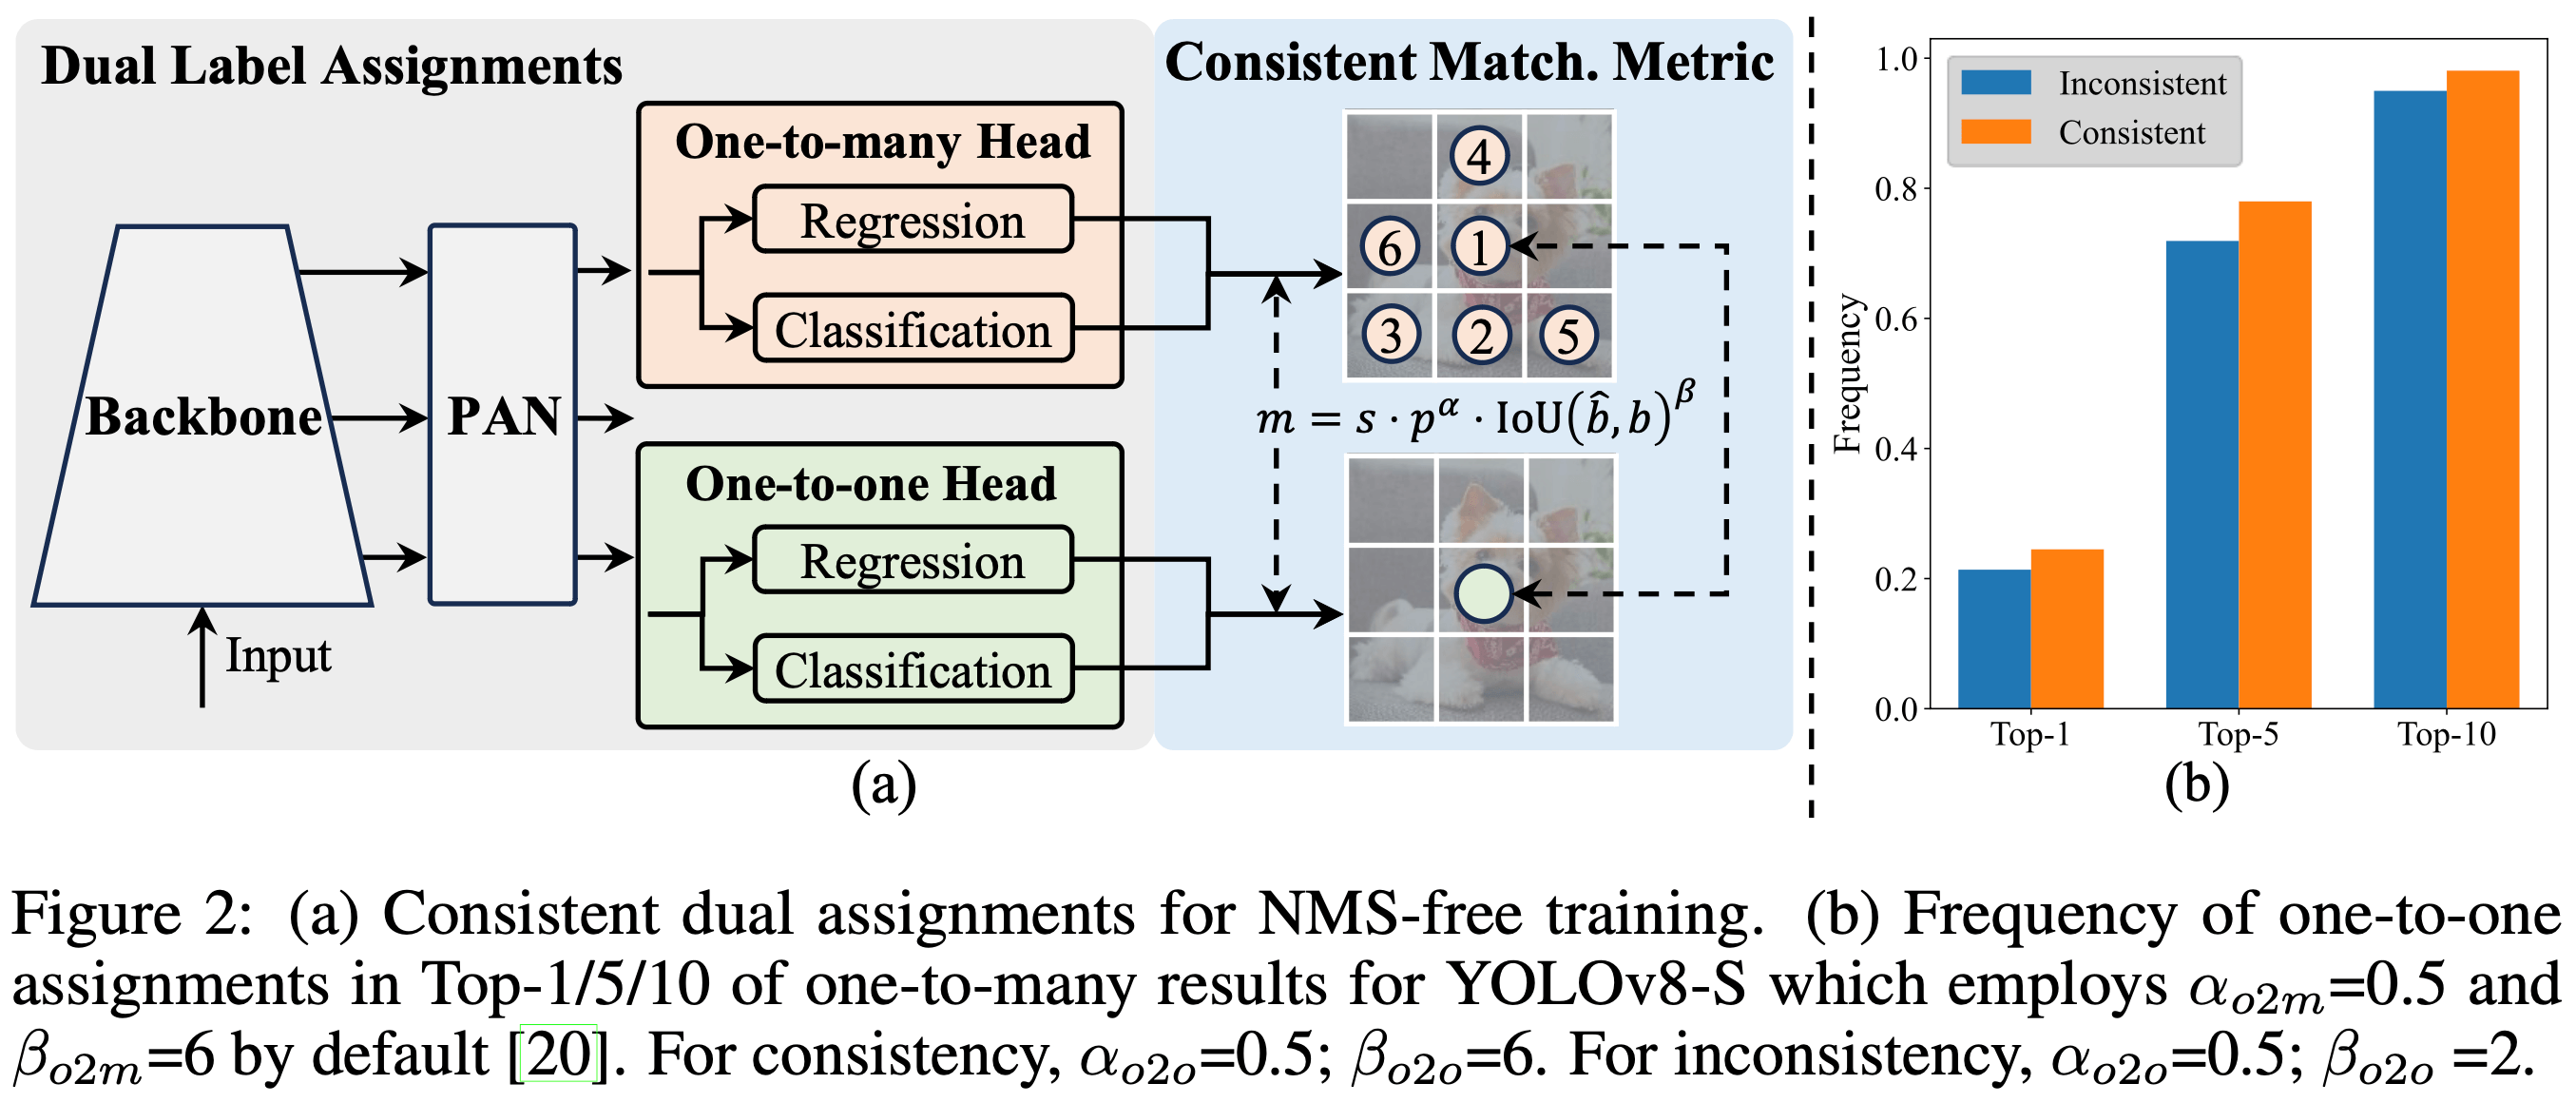

### Architecture
#### The architecture of YOLOv10 builds upon the strengths of previous YOLO models while introducing several key innovations. The model architecture consists of the following components:

#### Backbone: Responsible for feature extraction, the backbone in YOLOv10 uses an enhanced version of CSPNet (Cross Stage Partial Network) to improve gradient flow and reduce computational redundancy.
#### Neck: The neck is designed to aggregate features from different scales and passes them to the head. It includes PAN (Path Aggregation Network) layers for effective multiscale feature fusion.
#### One-to-Many Head: Generates multiple predictions per object during training to provide rich supervisory signals and improve learning accuracy.
#### One-to-One Head: Generates a single best prediction per object during inference to eliminate the need for NMS, thereby reducing latency and improving efficiency.

## Model Variants
### YOLOv10 comes in various model scales to cater to different application needs:

#### YOLOv10-N: Nano version for extremely resource-constrained environments.
#### YOLOv10-S: Small version balancing speed and accuracy.
#### YOLOv10-M: Medium version for general-purpose use.
#### YOLOv10-B: Balanced version with increased width for higher accuracy.
#### YOLOv10-L: Large version for higher accuracy at the cost of increased computational resources.
#### YOLOv10-X: Extra-large version for maximum accuracy and performance.

# INFERENCING

In [16]:
# ! pip install ultralytics
# ! pip install supervision

In [4]:
import cv2
import supervision as sv
from ultralytics import YOLOv10
import wget

In [40]:
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt')
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt')
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt')
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt')
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt')
wget.download('https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt')

100% [......................................................................] 128288859 / 128288859

'yolov10x.pt'

In [43]:
model = YOLOv10('yolov10n.pt')

In [44]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    
    annotated_image = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    cv2.imshow('YOLO', annotated_image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 1 couch, 63.8ms
Speed: 5.5ms preprocess, 63.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 67.8ms
Speed: 6.3ms preprocess, 67.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 53.6ms
Speed: 4.0ms preprocess, 53.6ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 49.1ms
Speed: 7.8ms preprocess, 49.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 43.5ms
Speed: 7.1ms preprocess, 43.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 46.9ms
Speed: 6.3ms preprocess, 46.9ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 53.1ms
Speed: 4.5ms preprocess, 53.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 41.9ms
Speed: 3.3ms preprocess, 41.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.8ms
Speed: 6.3ms preprocess, 38.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 53.2ms
Speed: 9.4ms preprocess, 53.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 59.5ms
Speed: 2.6ms preprocess, 59.5ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 49.6ms
Speed: 4.8ms preprocess, 49.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 46.0ms
Speed: 3.7ms preprocess, 46.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.2ms
Speed: 5.2ms preprocess, 37.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 44.6ms
Speed: 6.5ms preprocess, 44.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 36.8ms
Speed: 3.7ms preprocess, 36.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 39.5ms
Speed: 4.8ms preprocess, 39.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 46.6ms
Speed: 7.9ms preprocess, 46.6ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 43.7ms
Speed: 3.7ms preprocess, 43.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 36.0ms
Speed: 8.7ms preprocess, 36.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 44.0ms
Speed: 6.0ms preprocess, 44.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 33.9ms
Speed: 6.8ms preprocess, 33.9ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.3ms
Speed: 6.8ms preprocess, 35.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 51.8ms
Speed: 5.3ms preprocess, 51.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 42.3ms
Speed: 13.9ms preprocess, 42.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 53.8ms
Speed: 3.7ms preprocess, 53.8ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 41.6ms
Speed: 4.8ms preprocess, 41.6ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 34.0ms
Speed: 3.8ms preprocess, 34.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 44.2ms
Speed: 7.5ms preprocess, 44.2ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.8ms
Speed: 7.9ms preprocess, 37.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 43.1ms
Speed: 5.9ms preprocess, 43.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 50.1ms
Speed: 4.5ms preprocess, 50.1ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 46.8ms
Speed: 2.2ms preprocess, 46.8ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 53.6ms
Speed: 5.6ms preprocess, 53.6ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 52.2ms
Speed: 8.2ms preprocess, 52.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 46.3ms
Speed: 6.3ms preprocess, 46.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 1 bed, 43.1ms
Speed: 3.3ms preprocess, 43.1ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 51.6ms
Speed: 5.3ms preprocess, 51.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 1 bed, 54.2ms
Speed: 9.7ms preprocess, 54.2ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 41.4ms
Speed: 3.8ms preprocess, 41.4ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 1 bed, 49.4ms
Speed: 9.2ms preprocess, 49.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 40.8ms
Speed: 3.0ms preprocess, 40.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 1 bed, 41.6ms
Speed: 6.0ms preprocess, 41.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 39.5ms
Speed: 3.3ms preprocess, 39.5ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 35.7ms
Speed: 9.3ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 32.0ms
Speed: 6.2ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 35.1ms
Speed: 5.2ms preprocess, 35.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.9ms
Speed: 12.0ms preprocess, 31.9ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 54.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.4ms preprocess, 54.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 44.6ms
Speed: 3.6ms preprocess, 44.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 39.2ms
Speed: 4.5ms preprocess, 39.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 43.7ms
Speed: 4.6ms preprocess, 43.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 38.3ms
Speed: 7.0ms preprocess, 38.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 41.2ms
Speed: 6.3ms preprocess, 41.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 41.2ms
Speed: 3.3ms preprocess, 41.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 41.4ms
Speed: 5.2ms preprocess, 41.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 persons, 1 couch, 55.6ms
Speed: 6.0ms preprocess, 55.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 cell phone, 51.3ms
Speed: 5.5ms preprocess, 51.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 cell phone, 42.6ms
Speed: 6.3ms preprocess, 42.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 1 cell phone, 1 toothbrush, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 40.1ms
Speed: 4.5ms preprocess, 40.1ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 1 couch, 2 toothbrushs, 46.9ms
Speed: 7.8ms preprocess, 46.9ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.1ms
Speed: 6.3ms preprocess, 31.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 2 toothbrushs, 31.5ms
Speed: 4.5ms preprocess, 31.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 toothbrush, 35.8ms
Speed: 3.3ms preprocess, 35.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 47.3ms
Speed: 3.8ms preprocess, 47.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 46.1ms
Speed: 6.0ms preprocess, 46.1ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.7ms
Speed: 3.0ms preprocess, 27.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.6ms
Speed: 3.7ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 26.8ms
Speed: 3.0ms preprocess, 26.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 42.2ms
Speed: 6.0ms preprocess, 42.2ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 31.0ms
Speed: 3.3ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 bowl, 1 couch, 27.6ms
Speed: 3.3ms preprocess, 27.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 29.5ms
Speed: 2.2ms preprocess, 29.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 44.4ms
Speed: 3.6ms preprocess, 44.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 45.5ms
Speed: 4.5ms preprocess, 45.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 27.0ms
Speed: 5.5ms preprocess, 27.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 37.2ms
Speed: 3.2ms preprocess, 37.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 38.6ms
Speed: 5.3ms preprocess, 38.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 28.8ms
Speed: 2.5ms preprocess, 28.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 30.9ms
Speed: 3.7ms preprocess, 30.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 bowl, 1 couch, 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 32.9ms
Speed: 4.0ms preprocess, 32.9ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 couch, 40.1ms
Speed: 3.7ms preprocess, 40.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 bowl, 1 couch, 28.8ms
Speed: 3.0ms preprocess, 28.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 30.5ms
Speed: 4.5ms preprocess, 30.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.1ms
Speed: 7.0ms preprocess, 29.1ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 36.2ms
Speed: 3.0ms preprocess, 36.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.9ms
Speed: 4.1ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 42.7ms
Speed: 4.5ms preprocess, 42.7ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 30.4ms
Speed: 3.3ms preprocess, 30.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.7ms
Speed: 2.4ms preprocess, 37.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 28.3ms
Speed: 3.7ms preprocess, 28.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 33.2ms
Speed: 3.0ms preprocess, 33.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.1ms
Speed: 7.1ms preprocess, 29.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.0ms
Speed: 3.3ms preprocess, 28.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.3ms
Speed: 2.2ms preprocess, 32.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 34.2ms
Speed: 4.5ms preprocess, 34.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.7ms
Speed: 5.6ms preprocess, 27.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.1ms
Speed: 4.8ms preprocess, 32.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 26.6ms
Speed: 5.5ms preprocess, 26.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.2ms
Speed: 3.7ms preprocess, 30.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 52.3ms
Speed: 4.0ms preprocess, 52.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 cell phone, 35.1ms
Speed: 5.6ms preprocess, 35.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.0ms
Speed: 3.7ms preprocess, 38.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 31.0ms
Speed: 4.5ms preprocess, 31.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 bed, 49.4ms
Speed: 7.9ms preprocess, 49.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 36.0ms
Speed: 5.6ms preprocess, 36.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.2ms
Speed: 3.0ms preprocess, 30.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 cell phone, 30.8ms
Speed: 4.1ms preprocess, 30.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.4ms
Speed: 4.5ms preprocess, 29.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 44.3ms
Speed: 2.2ms preprocess, 44.3ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 34.2ms
Speed: 2.5ms preprocess, 34.2ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.7ms
Speed: 5.3ms preprocess, 30.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 37.5ms
Speed: 3.0ms preprocess, 37.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.0ms
Speed: 3.7ms preprocess, 28.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.5ms
Speed: 3.7ms preprocess, 37.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 24.3ms
Speed: 4.5ms preprocess, 24.3ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 49.2ms
Speed: 7.0ms preprocess, 49.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.1ms
Speed: 5.6ms preprocess, 30.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 29.1ms
Speed: 4.1ms preprocess, 29.1ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.1ms
Speed: 3.8ms preprocess, 38.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 26.7ms
Speed: 3.7ms preprocess, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 41.5ms
Speed: 3.4ms preprocess, 41.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.8ms
Speed: 6.0ms preprocess, 27.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.9ms
Speed: 3.0ms preprocess, 28.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 33.4ms
Speed: 6.0ms preprocess, 33.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.8ms
Speed: 3.0ms preprocess, 37.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.9ms
Speed: 2.2ms preprocess, 29.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 35.7ms
Speed: 3.0ms preprocess, 35.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.1ms
Speed: 4.1ms preprocess, 37.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 48.2ms
Speed: 3.5ms preprocess, 48.2ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 26.0ms
Speed: 6.3ms preprocess, 26.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.0ms
Speed: 3.0ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.8ms
Speed: 4.5ms preprocess, 27.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 24.1ms
Speed: 4.1ms preprocess, 24.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.9ms
Speed: 3.7ms preprocess, 38.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.6ms
Speed: 2.2ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 28.6ms
Speed: 3.0ms preprocess, 28.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 46.5ms
Speed: 3.7ms preprocess, 46.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.3ms
Speed: 3.7ms preprocess, 30.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 36.0ms
Speed: 4.1ms preprocess, 36.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.9ms
Speed: 5.3ms preprocess, 30.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 52.4ms
Speed: 6.7ms preprocess, 52.4ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.1ms
Speed: 6.0ms preprocess, 29.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 29.4ms
Speed: 3.4ms preprocess, 29.4ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.3ms
Speed: 4.8ms preprocess, 38.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 44.1ms
Speed: 3.7ms preprocess, 44.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 26.9ms
Speed: 6.1ms preprocess, 26.9ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.8ms
Speed: 2.5ms preprocess, 37.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.2ms
Speed: 3.7ms preprocess, 27.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 toothbrush, 36.7ms
Speed: 4.5ms preprocess, 36.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.3ms
Speed: 4.0ms preprocess, 29.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 37.4ms
Speed: 4.1ms preprocess, 37.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 27.8ms
Speed: 4.1ms preprocess, 27.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.9ms
Speed: 5.2ms preprocess, 29.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 36.9ms
Speed: 4.1ms preprocess, 36.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 40.5ms
Speed: 6.2ms preprocess, 40.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 28.1ms
Speed: 3.2ms preprocess, 28.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 cup, 1 toothbrush, 27.1ms
Speed: 3.7ms preprocess, 27.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 cup, 38.0ms
Speed: 8.6ms preprocess, 38.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.2ms
Speed: 3.7ms preprocess, 30.2ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 34.4ms
Speed: 5.3ms preprocess, 34.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 32.1ms
Speed: 5.3ms preprocess, 32.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.3ms
Speed: 7.5ms preprocess, 38.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 26.8ms
Speed: 2.2ms preprocess, 26.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 48.5ms
Speed: 3.3ms preprocess, 48.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 cell phone, 33.9ms
Speed: 4.7ms preprocess, 33.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.5ms
Speed: 4.5ms preprocess, 35.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 50.6ms
Speed: 6.3ms preprocess, 50.6ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.0ms
Speed: 3.7ms preprocess, 35.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.7ms
Speed: 3.8ms preprocess, 30.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 cup, 1 couch, 31.0ms
Speed: 3.7ms preprocess, 31.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.0ms
Speed: 6.9ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 53.8ms
Speed: 4.8ms preprocess, 53.8ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 40.6ms
Speed: 7.9ms preprocess, 40.6ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 58.6ms
Speed: 4.6ms preprocess, 58.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 toothbrushs, 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 42.8ms
Speed: 3.7ms preprocess, 42.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.8ms
Speed: 6.0ms preprocess, 30.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 38.2ms
Speed: 3.0ms preprocess, 38.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 cell phone, 29.9ms
Speed: 4.5ms preprocess, 29.9ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.1ms
Speed: 8.6ms preprocess, 32.1ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 cell phone, 51.1ms
Speed: 4.5ms preprocess, 51.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 33.8ms
Speed: 4.1ms preprocess, 33.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.2ms
Speed: 3.7ms preprocess, 30.2ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.8ms
Speed: 2.2ms preprocess, 29.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 toothbrush, 30.1ms
Speed: 4.8ms preprocess, 30.1ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 toothbrush, 31.2ms
Speed: 3.0ms preprocess, 31.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.1ms
Speed: 6.6ms preprocess, 28.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 28.4ms
Speed: 3.8ms preprocess, 28.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 32.1ms
Speed: 3.0ms preprocess, 32.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 29.9ms
Speed: 2.2ms preprocess, 29.9ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 toothbrush, 29.2ms
Speed: 3.7ms preprocess, 29.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 toothbrush, 25.4ms
Speed: 3.7ms preprocess, 25.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 26.6ms
Speed: 4.1ms preprocess, 26.6ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 26.1ms
Speed: 3.7ms preprocess, 26.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 34.8ms
Speed: 3.7ms preprocess, 34.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 37.5ms
Speed: 5.5ms preprocess, 37.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 toothbrush, 38.7ms
Speed: 6.1ms preprocess, 38.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 32.2ms
Speed: 2.5ms preprocess, 32.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 30.3ms
Speed: 3.0ms preprocess, 30.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 1 toothbrush, 34.8ms
Speed: 3.3ms preprocess, 34.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 26.6ms
Speed: 4.6ms preprocess, 26.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 36.0ms
Speed: 4.5ms preprocess, 36.0ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 33.7ms
Speed: 4.1ms preprocess, 33.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 31.4ms
Speed: 4.4ms preprocess, 31.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.9ms
Speed: 2.2ms preprocess, 27.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 27.1ms
Speed: 3.7ms preprocess, 27.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 person, 31.5ms
Speed: 3.8ms preprocess, 31.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 28.6ms
Speed: 5.6ms preprocess, 28.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 33.5ms
Speed: 3.7ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 55.9ms
Speed: 4.0ms preprocess, 55.9ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 28.6ms
Speed: 4.9ms preprocess, 28.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 34.8ms
Speed: 7.8ms preprocess, 34.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 30.8ms
Speed: 3.7ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 29.2ms
Speed: 3.2ms preprocess, 29.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 29.6ms
Speed: 3.0ms preprocess, 29.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 40.8ms
Speed: 4.6ms preprocess, 40.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 toothbrush, 29.4ms
Speed: 5.3ms preprocess, 29.4ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 33.1ms
Speed: 3.7ms preprocess, 33.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 toothbrush, 33.8ms
Speed: 2.3ms preprocess, 33.8ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 44.0ms
Speed: 3.7ms preprocess, 44.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 48.2ms
Speed: 3.7ms preprocess, 48.2ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 29.8ms
Speed: 4.1ms preprocess, 29.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 36.4ms
Speed: 8.3ms preprocess, 36.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 31.9ms
Speed: 2.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 41.6ms
Speed: 4.5ms preprocess, 41.6ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 32.6ms
Speed: 4.8ms preprocess, 32.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 toothbrush, 50.9ms
Speed: 3.0ms preprocess, 50.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 39.4ms
Speed: 5.2ms preprocess, 39.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 48.5ms
Speed: 3.5ms preprocess, 48.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.4ms
Speed: 3.7ms preprocess, 35.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 39.4ms
Speed: 2.6ms preprocess, 39.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 41.6ms
Speed: 5.2ms preprocess, 41.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 29.0ms
Speed: 5.3ms preprocess, 29.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.2ms
Speed: 6.7ms preprocess, 32.2ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 44.4ms
Speed: 3.0ms preprocess, 44.4ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 remote, 1 cell phone, 42.9ms
Speed: 4.5ms preprocess, 42.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 41.7ms
Speed: 4.5ms preprocess, 41.7ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 40.5ms
Speed: 3.7ms preprocess, 40.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 34.9ms
Speed: 5.2ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 1 bed, 45.0ms
Speed: 3.3ms preprocess, 45.0ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 39.2ms
Speed: 2.2ms preprocess, 39.2ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.7ms
Speed: 5.5ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 22.0ms
Speed: 3.7ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 30.8ms
Speed: 2.7ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 26.3ms
Speed: 5.5ms preprocess, 26.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 28.1ms
Speed: 3.7ms preprocess, 28.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 42.0ms
Speed: 3.3ms preprocess, 42.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 34.1ms
Speed: 4.0ms preprocess, 34.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.0ms
Speed: 4.0ms preprocess, 30.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 34.3ms
Speed: 1.5ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 33.3ms
Speed: 3.0ms preprocess, 33.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.1ms
Speed: 4.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 34.0ms
Speed: 4.7ms preprocess, 34.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 chair, 1 couch, 33.2ms
Speed: 7.7ms preprocess, 33.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 32.9ms
Speed: 3.3ms preprocess, 32.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 31.7ms
Speed: 4.8ms preprocess, 31.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 31.6ms
Speed: 5.2ms preprocess, 31.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 27.2ms
Speed: 4.0ms preprocess, 27.2ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 33.3ms
Speed: 5.5ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 30.2ms
Speed: 4.5ms preprocess, 30.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 40.0ms
Speed: 4.0ms preprocess, 40.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 28.1ms
Speed: 3.7ms preprocess, 28.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 49.4ms
Speed: 3.3ms preprocess, 49.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 35.7ms
Speed: 4.1ms preprocess, 35.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 person, 1 couch, 32.2ms
Speed: 2.2ms preprocess, 32.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 couch, 41.6ms
Speed: 3.0ms preprocess, 41.6ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


# MODEL TRAINING ON CUSTOM DATASET

## collecting images for dataset

In [45]:
import cv2
import uuid  
import os
import time

In [46]:
path = 'data/images/'

In [47]:
capture = cv2.VideoCapture(1)

counter = 1
while True:
    ret, frame = capture.read()
    
    if not ret:
        break

    cv2.imshow(f'Collecting Image {counter}', frame)

    k = cv2.waitKey(1)

    if k%256 == 27:
        break

    elif k%256 == ord('s'):
        image_name = f'{path}_image_{counter}.jpg'
        cv2.imwrite(image_name, frame)
        print(f'image_{counter}.jpg saved')
        counter = counter + 1

capture.release()
cv2.destroyAllWindows()   

image_1.jpg saved
image_2.jpg saved
image_3.jpg saved
image_4.jpg saved
image_5.jpg saved
image_6.jpg saved
image_7.jpg saved
image_8.jpg saved
image_9.jpg saved
image_10.jpg saved
image_11.jpg saved
image_12.jpg saved
image_13.jpg saved
image_14.jpg saved
image_15.jpg saved
image_16.jpg saved
image_17.jpg saved
image_18.jpg saved
image_19.jpg saved
image_20.jpg saved
image_21.jpg saved
image_22.jpg saved
image_23.jpg saved
image_24.jpg saved
image_25.jpg saved
image_26.jpg saved
image_27.jpg saved
image_28.jpg saved
image_29.jpg saved
image_30.jpg saved
image_31.jpg saved
image_32.jpg saved
image_33.jpg saved
image_34.jpg saved
image_35.jpg saved
image_36.jpg saved
image_37.jpg saved
image_38.jpg saved
image_39.jpg saved
image_40.jpg saved
image_41.jpg saved
image_42.jpg saved
image_43.jpg saved
image_44.jpg saved
image_45.jpg saved
image_46.jpg saved


# INFERENCING TRAINED MODEL

In [48]:
model_path = 'best.pt'
model = YOLOv10(model_path)

In [49]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    
    annotated_image = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    cv2.imshow('YOLO', annotated_image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 65.2ms
Speed: 37.1ms preprocess, 65.2ms inference, 50.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 58.3ms
Speed: 12.4ms preprocess, 58.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 71.0ms
Speed: 7.0ms preprocess, 71.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 54.9ms
Speed: 11.2ms preprocess, 54.9ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.8ms preprocess, 42.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.9ms
Speed: 5.5ms preprocess, 49.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 4.8ms preprocess, 36.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 50.4ms
Speed: 7.5ms preprocess, 50.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.7ms
Speed: 4.5ms preprocess, 50.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.5ms
Speed: 8.3ms preprocess, 40.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 40.3ms
Speed: 3.7ms preprocess, 40.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.0ms
Speed: 5.2ms preprocess, 41.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 5.2ms preprocess, 36.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 40.8ms
Speed: 5.5ms preprocess, 40.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.3ms
Speed: 7.9ms preprocess, 38.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.5ms
Speed: 6.7ms preprocess, 41.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 46.2ms
Speed: 6.0ms preprocess, 46.2ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.3ms
Speed: 4.8ms preprocess, 40.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 4.5ms preprocess, 34.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.5ms
Speed: 10.8ms preprocess, 32.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.2ms
Speed: 3.8ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.5ms
Speed: 7.8ms preprocess, 41.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 38.1ms
Speed: 5.2ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 6.8ms preprocess, 35.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.6ms
Speed: 5.2ms preprocess, 27.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.2ms
Speed: 6.0ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.5ms
Speed: 4.6ms preprocess, 44.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.1ms
Speed: 8.3ms preprocess, 42.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.6ms
Speed: 1.8ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 6.1ms preprocess, 33.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 4.7ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.0ms
Speed: 3.0ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 51.4ms
Speed: 4.1ms preprocess, 51.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 6.9ms preprocess, 35.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.2ms
Speed: 5.2ms preprocess, 42.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.2ms
Speed: 4.5ms preprocess, 40.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.5ms
Speed: 6.3ms preprocess, 47.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.5ms
Speed: 4.1ms preprocess, 34.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.1ms
Speed: 7.8ms preprocess, 47.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 3.3ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 47.0ms
Speed: 3.7ms preprocess, 47.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 8.5ms preprocess, 34.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.9ms
Speed: 7.9ms preprocess, 40.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.1ms
Speed: 4.0ms preprocess, 44.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.0ms
Speed: 3.7ms preprocess, 43.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 46.5ms
Speed: 6.0ms preprocess, 46.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.8ms
Speed: 6.3ms preprocess, 42.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 5.2ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.9ms
Speed: 5.5ms preprocess, 44.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.3ms
Speed: 8.6ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.5ms
Speed: 7.7ms preprocess, 38.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.7ms
Speed: 7.1ms preprocess, 29.7ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 41.0ms
Speed: 6.0ms preprocess, 41.0ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 3.7ms preprocess, 35.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 35.0ms
Speed: 6.2ms preprocess, 35.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 53.4ms
Speed: 7.1ms preprocess, 53.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.7ms
Speed: 6.0ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.3ms
Speed: 5.1ms preprocess, 44.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.5ms
Speed: 6.2ms preprocess, 39.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.2ms
Speed: 5.2ms preprocess, 38.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.9ms
Speed: 4.1ms preprocess, 40.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.4ms
Speed: 3.4ms preprocess, 41.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.5ms
Speed: 6.7ms preprocess, 39.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.0ms
Speed: 4.1ms preprocess, 38.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 43.4ms
Speed: 6.0ms preprocess, 43.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 31.1ms
Speed: 7.3ms preprocess, 31.1ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 4.8ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 41.9ms
Speed: 8.3ms preprocess, 41.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 39.2ms
Speed: 6.3ms preprocess, 39.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 42.0ms
Speed: 4.9ms preprocess, 42.0ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 36.8ms
Speed: 9.3ms preprocess, 36.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.3ms
Speed: 5.6ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 45.7ms
Speed: 3.7ms preprocess, 45.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 55.4ms
Speed: 4.5ms preprocess, 55.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.3ms
Speed: 4.9ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 28.0ms
Speed: 3.0ms preprocess, 28.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 29.7ms
Speed: 4.9ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 40.5ms
Speed: 4.0ms preprocess, 40.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.2ms
Speed: 6.0ms preprocess, 27.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 25.3ms
Speed: 2.2ms preprocess, 25.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 42.3ms
Speed: 3.3ms preprocess, 42.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 28.6ms
Speed: 4.5ms preprocess, 28.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 34.1ms
Speed: 4.0ms preprocess, 34.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 33.0ms
Speed: 4.0ms preprocess, 33.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 29.2ms
Speed: 3.3ms preprocess, 29.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 2 remotes, 27.1ms
Speed: 3.0ms preprocess, 27.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 38.3ms
Speed: 3.8ms preprocess, 38.3ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 26.8ms
Speed: 6.3ms preprocess, 26.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 32.4ms
Speed: 3.0ms preprocess, 32.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 35.4ms
Speed: 3.0ms preprocess, 35.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 remotes, 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 41.1ms
Speed: 2.2ms preprocess, 41.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 30.0ms
Speed: 2.2ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 35.1ms
Speed: 3.0ms preprocess, 35.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 33.8ms
Speed: 5.3ms preprocess, 33.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 29.2ms
Speed: 3.7ms preprocess, 29.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 34.6ms
Speed: 4.1ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.2ms
Speed: 3.0ms preprocess, 27.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 27.2ms
Speed: 2.3ms preprocess, 27.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 35.9ms
Speed: 2.2ms preprocess, 35.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 27.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.0ms
Speed: 3.2ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 24.8ms
Speed: 2.2ms preprocess, 24.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 26.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 26.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 34.5ms
Speed: 3.3ms preprocess, 34.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 35.4ms
Speed: 4.7ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 37.7ms
Speed: 4.8ms preprocess, 37.7ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 24.4ms
Speed: 4.5ms preprocess, 24.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 33.0ms
Speed: 5.6ms preprocess, 33.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 29.3ms
Speed: 5.5ms preprocess, 29.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 22.7ms
Speed: 4.0ms preprocess, 22.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 29.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.6ms preprocess, 29.6ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 36.8ms
Speed: 4.8ms preprocess, 36.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 25.5ms
Speed: 3.0ms preprocess, 25.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 42.6ms
Speed: 3.0ms preprocess, 42.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 44.8ms
Speed: 3.0ms preprocess, 44.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 33.4ms
Speed: 3.7ms preprocess, 33.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 38.3ms
Speed: 2.2ms preprocess, 38.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 54.5ms
Speed: 5.5ms preprocess, 54.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 bottle, 1 remote, 31.2ms
Speed: 3.0ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 40.9ms
Speed: 3.7ms preprocess, 40.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 1 remote, 38.6ms
Speed: 4.0ms preprocess, 38.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 27.6ms
Speed: 3.0ms preprocess, 27.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 31.6ms
Speed: 1.8ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 27.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.5ms preprocess, 27.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 22.0ms
Speed: 3.4ms preprocess, 22.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 19.7ms
Speed: 4.5ms preprocess, 19.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 31.8ms
Speed: 3.3ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 bottle, 2 remotes, 32.6ms
Speed: 5.2ms preprocess, 32.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 2 remotes, 26.4ms
Speed: 6.4ms preprocess, 26.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 46.4ms
Speed: 3.3ms preprocess, 46.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 28.6ms
Speed: 7.0ms preprocess, 28.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 27.8ms
Speed: 2.2ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 22.9ms
Speed: 3.7ms preprocess, 22.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 27.7ms
Speed: 2.3ms preprocess, 27.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 29.3ms
Speed: 3.0ms preprocess, 29.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 31.6ms
Speed: 3.3ms preprocess, 31.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 28.7ms
Speed: 3.0ms preprocess, 28.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 32.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 32.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 27.9ms
Speed: 3.7ms preprocess, 27.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 1 remote, 26.4ms
Speed: 4.1ms preprocess, 26.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 33.0ms
Speed: 3.3ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 25.3ms
Speed: 4.8ms preprocess, 25.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 1 remote, 42.9ms
Speed: 5.3ms preprocess, 42.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 40.9ms
Speed: 5.2ms preprocess, 40.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 26.3ms
Speed: 5.2ms preprocess, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.5ms
Speed: 3.7ms preprocess, 32.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.8ms
Speed: 5.2ms preprocess, 27.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.9ms
Speed: 2.2ms preprocess, 26.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 33.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.7ms
Speed: 3.7ms preprocess, 27.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.6ms
Speed: 4.5ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.5ms
Speed: 3.8ms preprocess, 29.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.8ms
Speed: 3.7ms preprocess, 24.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 3.7ms preprocess, 35.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 28.9ms
Speed: 3.7ms preprocess, 28.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 33.3ms
Speed: 4.0ms preprocess, 33.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.8ms preprocess, 27.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.5ms
Speed: 2.5ms preprocess, 27.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.4ms
Speed: 3.7ms preprocess, 25.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.2ms
Speed: 6.0ms preprocess, 26.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.3ms
Speed: 4.0ms preprocess, 30.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.0ms
Speed: 4.7ms preprocess, 27.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 3.2ms preprocess, 32.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 4.5ms preprocess, 23.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.8ms
Speed: 4.0ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 36.4ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 6.9ms preprocess, 23.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.5ms
Speed: 4.8ms preprocess, 25.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.2ms
Speed: 3.0ms preprocess, 41.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.7ms
Speed: 4.5ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms
Speed: 2.2ms preprocess, 26.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 5.2ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 27.7ms
Speed: 3.4ms preprocess, 27.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.4ms
Speed: 3.7ms preprocess, 27.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 3.7ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 41.5ms
Speed: 1.9ms preprocess, 41.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 24.2ms
Speed: 2.2ms preprocess, 24.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.0ms
Speed: 5.7ms preprocess, 29.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 49.5ms
Speed: 3.7ms preprocess, 49.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 32.1ms
Speed: 3.0ms preprocess, 32.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 26.0ms
Speed: 3.8ms preprocess, 26.0ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 29.0ms
Speed: 3.2ms preprocess, 29.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 28.5ms
Speed: 3.0ms preprocess, 28.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 23.4ms
Speed: 4.6ms preprocess, 23.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 bottle, 1 remote, 24.1ms
Speed: 3.7ms preprocess, 24.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 31.8ms
Speed: 3.6ms preprocess, 31.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 21.5ms
Speed: 5.5ms preprocess, 21.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.4ms
Speed: 5.2ms preprocess, 27.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 28.9ms
Speed: 4.5ms preprocess, 28.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 32.6ms
Speed: 3.7ms preprocess, 32.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.2ms
Speed: 3.7ms preprocess, 27.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.2ms
Speed: 2.6ms preprocess, 31.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 25.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 25.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 37.3ms
Speed: 3.0ms preprocess, 37.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 28.2ms
Speed: 4.0ms preprocess, 28.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 35.0ms
Speed: 4.1ms preprocess, 35.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.3ms
Speed: 3.3ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.8ms
Speed: 3.7ms preprocess, 27.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 27.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 36.0ms
Speed: 3.0ms preprocess, 36.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 24.5ms
Speed: 6.3ms preprocess, 24.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 26.5ms
Speed: 4.7ms preprocess, 26.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 41.5ms
Speed: 4.0ms preprocess, 41.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 32.8ms
Speed: 3.3ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 30.4ms
Speed: 4.5ms preprocess, 30.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 28.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.6ms preprocess, 28.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 30.2ms
Speed: 3.0ms preprocess, 30.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 27.6ms
Speed: 4.5ms preprocess, 27.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 21.7ms
Speed: 3.0ms preprocess, 21.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 26.3ms
Speed: 3.7ms preprocess, 26.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 21.6ms
Speed: 4.8ms preprocess, 21.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 remotes, 43.5ms
Speed: 4.8ms preprocess, 43.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 32.5ms
Speed: 3.8ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 25.2ms
Speed: 2.2ms preprocess, 25.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 24.7ms
Speed: 4.0ms preprocess, 24.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 remote, 21.7ms
Speed: 3.7ms preprocess, 21.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 44.8ms
Speed: 4.1ms preprocess, 44.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 24.0ms
Speed: 3.8ms preprocess, 24.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 30.1ms
Speed: 3.8ms preprocess, 30.1ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 31.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 31.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 28.5ms
Speed: 3.0ms preprocess, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 35.7ms
Speed: 3.0ms preprocess, 35.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 31.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.2ms
Speed: 3.0ms preprocess, 29.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 2 remotes, 37.3ms
Speed: 3.7ms preprocess, 37.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 30.2ms
Speed: 5.6ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 26.1ms
Speed: 4.1ms preprocess, 26.1ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.6ms
Speed: 4.8ms preprocess, 24.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 33.6ms
Speed: 4.8ms preprocess, 33.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 30.7ms
Speed: 4.0ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 28.9ms
Speed: 3.7ms preprocess, 28.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 28.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 28.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 35.0ms
Speed: 4.6ms preprocess, 35.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 26.9ms
Speed: 3.0ms preprocess, 26.9ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 29.3ms
Speed: 3.3ms preprocess, 29.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 28.5ms
Speed: 5.6ms preprocess, 28.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 31.6ms
Speed: 4.8ms preprocess, 31.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 32.3ms
Speed: 3.8ms preprocess, 32.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 remote, 24.5ms
Speed: 3.8ms preprocess, 24.5ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 31.7ms
Speed: 2.6ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 remotes, 40.3ms
Speed: 3.7ms preprocess, 40.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 remotes, 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 remote, 22.0ms
Speed: 4.1ms preprocess, 22.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 remote, 39.0ms
Speed: 5.5ms preprocess, 39.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.0ms
Speed: 3.0ms preprocess, 30.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 31.3ms
Speed: 3.7ms preprocess, 31.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 28.6ms
Speed: 4.5ms preprocess, 28.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 21.9ms
Speed: 4.1ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 33.0ms
Speed: 6.3ms preprocess, 33.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 1 remote, 35.7ms
Speed: 4.5ms preprocess, 35.7ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 31.5ms
Speed: 4.3ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 remote, 27.6ms
Speed: 4.8ms preprocess, 27.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 20.0ms
Speed: 5.6ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 2 bottles, 1 remote, 28.1ms
Speed: 4.5ms preprocess, 28.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 remote, 27.1ms
Speed: 7.0ms preprocess, 27.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 29.9ms
Speed: 3.3ms preprocess, 29.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.3ms
Speed: 3.0ms preprocess, 27.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 4.5ms preprocess, 34.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.1ms
Speed: 2.2ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 24.0ms
Speed: 3.7ms preprocess, 24.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.8ms
Speed: 2.5ms preprocess, 24.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 32.7ms
Speed: 4.7ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.9ms
Speed: 6.0ms preprocess, 47.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.2ms
Speed: 3.7ms preprocess, 35.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 3.7ms preprocess, 25.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 2.2ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.2ms
Speed: 5.3ms preprocess, 45.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.6ms
Speed: 4.6ms preprocess, 24.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 3.2ms preprocess, 36.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 5.6ms preprocess, 35.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 28.5ms
Speed: 2.3ms preprocess, 28.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 3.7ms preprocess, 25.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 4.5ms preprocess, 34.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.5ms
Speed: 3.0ms preprocess, 27.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 4.8ms preprocess, 32.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.2ms
Speed: 3.3ms preprocess, 45.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 3.2ms preprocess, 27.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.2ms
Speed: 4.1ms preprocess, 31.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 3.7ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 26.0ms
Speed: 5.4ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.4ms
Speed: 4.5ms preprocess, 23.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 31.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 2.2ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.3ms
Speed: 8.6ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.6ms
Speed: 2.6ms preprocess, 37.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 2.2ms preprocess, 29.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 5.2ms preprocess, 25.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms
Speed: 2.2ms preprocess, 28.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.7ms
Speed: 3.3ms preprocess, 26.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 23.2ms
Speed: 6.8ms preprocess, 23.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 5.3ms preprocess, 34.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.7ms
Speed: 5.6ms preprocess, 28.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.4ms
Speed: 4.0ms preprocess, 39.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 4.1ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.6ms
Speed: 4.9ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 6.8ms preprocess, 35.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms
Speed: 3.2ms preprocess, 26.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.5ms
Speed: 3.0ms preprocess, 45.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 36.8ms
Speed: 3.7ms preprocess, 36.8ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.1ms
Speed: 3.7ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 33.5ms
Speed: 4.0ms preprocess, 33.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.6ms
Speed: 3.7ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 1.5ms preprocess, 26.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 6.0ms preprocess, 27.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.3ms
Speed: 4.5ms preprocess, 29.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.2ms
Speed: 3.0ms preprocess, 30.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 22.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.5ms
Speed: 4.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 38.0ms
Speed: 4.5ms preprocess, 38.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.6ms
Speed: 4.0ms preprocess, 42.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 4.0ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.5ms
Speed: 4.8ms preprocess, 27.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 31.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 6.0ms preprocess, 31.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 22.9ms
Speed: 4.5ms preprocess, 22.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 28.6ms
Speed: 3.0ms preprocess, 28.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 23.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 23.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 39.6ms
Speed: 7.0ms preprocess, 39.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.5ms
Speed: 3.9ms preprocess, 29.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.3ms
Speed: 3.7ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 29.7ms
Speed: 5.3ms preprocess, 29.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.7ms
Speed: 3.7ms preprocess, 24.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.2ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 5.2ms preprocess, 25.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 2.3ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.5ms preprocess, 26.4ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 3.0ms preprocess, 25.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms
Speed: 4.8ms preprocess, 27.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 30.2ms
Speed: 3.3ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms
Speed: 3.0ms preprocess, 28.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 6.3ms preprocess, 29.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.5ms
Speed: 2.8ms preprocess, 36.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 36.4ms
Speed: 5.2ms preprocess, 36.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 32.9ms
Speed: 2.5ms preprocess, 32.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.3ms
Speed: 4.8ms preprocess, 29.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 5.2ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.4ms
Speed: 6.3ms preprocess, 29.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 41.3ms
Speed: 5.2ms preprocess, 41.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms
Speed: 3.7ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.5ms
Speed: 2.4ms preprocess, 30.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.3ms
Speed: 3.7ms preprocess, 29.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.3ms
Speed: 3.0ms preprocess, 28.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.2ms preprocess, 35.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 4.8ms preprocess, 25.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.6ms
Speed: 5.3ms preprocess, 41.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.6ms
Speed: 2.3ms preprocess, 39.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms
Speed: 5.2ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.0ms
Speed: 4.5ms preprocess, 24.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.1ms
Speed: 7.0ms preprocess, 28.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 27.6ms
Speed: 7.5ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.0ms
Speed: 4.8ms preprocess, 41.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.6ms
Speed: 3.7ms preprocess, 44.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.1ms
Speed: 5.2ms preprocess, 43.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 25.0ms
Speed: 2.2ms preprocess, 25.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 24.5ms
Speed: 3.3ms preprocess, 24.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 36.1ms
Speed: 3.0ms preprocess, 36.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.5ms
Speed: 3.5ms preprocess, 27.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 36.1ms
Speed: 4.5ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.5ms
Speed: 3.0ms preprocess, 29.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.1ms
Speed: 3.8ms preprocess, 30.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 31.5ms
Speed: 2.2ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 35.8ms
Speed: 3.3ms preprocess, 35.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.0ms
Speed: 3.7ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 pens, 37.4ms
Speed: 2.5ms preprocess, 37.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 27.8ms
Speed: 4.7ms preprocess, 27.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 34.3ms
Speed: 7.3ms preprocess, 34.3ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 33.7ms
Speed: 3.7ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.3ms
Speed: 5.2ms preprocess, 27.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 21.7ms
Speed: 4.8ms preprocess, 21.7ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 28.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.8ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.6ms
Speed: 7.1ms preprocess, 27.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 40.1ms
Speed: 4.5ms preprocess, 40.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.6ms
Speed: 3.0ms preprocess, 29.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.8ms
Speed: 3.7ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 25.2ms
Speed: 4.8ms preprocess, 25.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 24.9ms
Speed: 7.0ms preprocess, 24.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 31.8ms
Speed: 4.0ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 30.3ms
Speed: 2.2ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 pens, 26.3ms
Speed: 2.5ms preprocess, 26.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 28.1ms
Speed: 3.0ms preprocess, 28.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 42.4ms
Speed: 4.1ms preprocess, 42.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 46.0ms
Speed: 6.1ms preprocess, 46.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 35.3ms
Speed: 3.0ms preprocess, 35.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.7ms
Speed: 2.5ms preprocess, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.2ms
Speed: 3.5ms preprocess, 26.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 23.2ms
Speed: 5.5ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.0ms
Speed: 5.2ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 5.3ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 29.0ms
Speed: 5.5ms preprocess, 29.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 3.7ms preprocess, 25.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 42.4ms
Speed: 4.5ms preprocess, 42.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 40.8ms
Speed: 5.5ms preprocess, 40.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 43.0ms
Speed: 3.0ms preprocess, 43.0ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 23.2ms
Speed: 7.1ms preprocess, 23.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 31.9ms
Speed: 4.4ms preprocess, 31.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 33.1ms
Speed: 8.6ms preprocess, 33.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 30.3ms
Speed: 4.6ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.1ms
Speed: 3.0ms preprocess, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.3ms
Speed: 4.0ms preprocess, 29.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.0ms
Speed: 3.0ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 23.8ms
Speed: 4.9ms preprocess, 23.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 24.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.8ms preprocess, 24.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.6ms
Speed: 3.7ms preprocess, 27.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 36.4ms
Speed: 7.0ms preprocess, 36.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 28.5ms
Speed: 3.0ms preprocess, 28.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.9ms
Speed: 2.2ms preprocess, 30.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 37.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.5ms preprocess, 37.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 36.9ms
Speed: 3.7ms preprocess, 36.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.8ms
Speed: 3.3ms preprocess, 27.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.3ms preprocess, 27.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.3ms
Speed: 3.8ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 43.2ms
Speed: 3.2ms preprocess, 43.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 21.9ms
Speed: 6.7ms preprocess, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 25.9ms
Speed: 4.5ms preprocess, 25.9ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.3ms
Speed: 4.1ms preprocess, 42.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.9ms
Speed: 2.6ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms
Speed: 4.8ms preprocess, 29.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.8ms
Speed: 2.2ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 31.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 41.6ms
Speed: 3.7ms preprocess, 41.6ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 34.9ms
Speed: 2.5ms preprocess, 34.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 pens, 38.4ms
Speed: 8.3ms preprocess, 38.4ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.1ms
Speed: 5.6ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 31.7ms
Speed: 3.8ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 31.8ms
Speed: 2.3ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 28.9ms
Speed: 3.7ms preprocess, 28.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 pens, 28.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 28.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 pens, 26.5ms
Speed: 2.2ms preprocess, 26.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 31.7ms
Speed: 2.6ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 pens, 34.6ms
Speed: 3.0ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.2ms
Speed: 1.5ms preprocess, 29.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 27.9ms
Speed: 2.9ms preprocess, 27.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 37.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 37.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 29.6ms
Speed: 4.5ms preprocess, 29.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 30.4ms
Speed: 2.2ms preprocess, 30.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 pen, 44.0ms
Speed: 2.5ms preprocess, 44.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms
Speed: 4.8ms preprocess, 27.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 3.0ms preprocess, 34.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 3 pens, 26.2ms
Speed: 8.4ms preprocess, 26.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 pens, 30.9ms
Speed: 4.8ms preprocess, 30.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 pens, 30.5ms
Speed: 3.0ms preprocess, 30.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 27.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pens, 27.2ms
Speed: 4.0ms preprocess, 27.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pen, 48.4ms
Speed: 6.2ms preprocess, 48.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 43.4ms
Speed: 8.8ms preprocess, 43.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.1ms
Speed: 4.3ms preprocess, 38.1ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 54.2ms
Speed: 6.7ms preprocess, 54.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.9ms
Speed: 5.6ms preprocess, 29.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.2ms
Speed: 3.2ms preprocess, 39.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.6ms
Speed: 3.7ms preprocess, 45.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.3ms
Speed: 7.1ms preprocess, 36.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 53.7ms
Speed: 4.0ms preprocess, 53.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms
Speed: 4.8ms preprocess, 29.3ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.2ms
Speed: 2.5ms preprocess, 30.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 6.1ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 35.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 3.2ms preprocess, 32.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 3.0ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.8ms preprocess, 26.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 3.3ms preprocess, 33.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 2.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 34.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.0ms
Speed: 2.5ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.3ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.7ms
Speed: 4.0ms preprocess, 36.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.3ms
Speed: 3.7ms preprocess, 25.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 3.7ms preprocess, 34.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.3ms
Speed: 3.0ms preprocess, 45.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.4ms
Speed: 3.0ms preprocess, 25.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.5ms
Speed: 9.4ms preprocess, 25.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 27.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms
Speed: 3.7ms preprocess, 28.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.1ms
Speed: 4.8ms preprocess, 30.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 37.1ms
Speed: 5.5ms preprocess, 37.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.0ms
Speed: 3.8ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 32.0ms
Speed: 5.0ms preprocess, 32.0ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 36.1ms
Speed: 4.5ms preprocess, 36.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 37.5ms
Speed: 3.0ms preprocess, 37.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 4.5ms preprocess, 36.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.8ms
Speed: 6.5ms preprocess, 41.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 5.2ms preprocess, 35.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 3.7ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.3ms
Speed: 4.0ms preprocess, 32.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 43.6ms
Speed: 3.7ms preprocess, 43.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 41.3ms
Speed: 5.3ms preprocess, 41.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 33.1ms
Speed: 3.4ms preprocess, 33.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 27.7ms
Speed: 5.5ms preprocess, 27.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 33.7ms
Speed: 5.2ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 24.0ms
Speed: 5.2ms preprocess, 24.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 23.1ms
Speed: 5.2ms preprocess, 23.1ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 38.9ms
Speed: 3.3ms preprocess, 38.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 43.0ms
Speed: 3.7ms preprocess, 43.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 23.7ms
Speed: 7.7ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 4.0ms preprocess, 34.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.0ms
Speed: 5.2ms preprocess, 32.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.9ms
Speed: 3.0ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 38.1ms
Speed: 3.0ms preprocess, 38.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 38.7ms
Speed: 3.8ms preprocess, 38.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 34.3ms
Speed: 3.0ms preprocess, 34.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.7ms
Speed: 5.2ms preprocess, 30.7ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 28.2ms
Speed: 4.5ms preprocess, 28.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 26.0ms
Speed: 4.1ms preprocess, 26.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 32.2ms
Speed: 5.2ms preprocess, 32.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 29.3ms
Speed: 2.3ms preprocess, 29.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 3.0ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 5.3ms preprocess, 36.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 bottle, 24.5ms
Speed: 3.5ms preprocess, 24.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 29.1ms
Speed: 2.2ms preprocess, 29.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 35.0ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.0ms
Speed: 3.0ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 25.8ms
Speed: 2.4ms preprocess, 25.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 38.8ms
Speed: 3.0ms preprocess, 38.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.0ms
Speed: 4.0ms preprocess, 29.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.7ms
Speed: 4.4ms preprocess, 27.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 44.8ms
Speed: 5.9ms preprocess, 44.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 32.0ms
Speed: 4.8ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 29.4ms
Speed: 3.0ms preprocess, 29.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 31.8ms
Speed: 6.0ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 27.1ms
Speed: 3.0ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 29.2ms
Speed: 3.0ms preprocess, 29.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 31.1ms
Speed: 3.0ms preprocess, 31.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 22.7ms
Speed: 2.3ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 33.8ms
Speed: 6.0ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 2 bottles, 26.4ms
Speed: 2.2ms preprocess, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 32.2ms
Speed: 2.3ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 27.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.2ms preprocess, 27.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 39.6ms
Speed: 3.0ms preprocess, 39.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 1 pen, 32.7ms
Speed: 3.7ms preprocess, 32.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 pen, 27.5ms
Speed: 6.3ms preprocess, 27.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 22.5ms
Speed: 3.8ms preprocess, 22.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 24.8ms
Speed: 4.5ms preprocess, 24.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 31.9ms
Speed: 3.0ms preprocess, 31.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 26.0ms
Speed: 3.1ms preprocess, 26.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 pen, 30.0ms
Speed: 1.8ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 28.6ms
Speed: 3.0ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 32.4ms
Speed: 3.8ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 32.7ms
Speed: 3.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 pen, 32.7ms
Speed: 3.0ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 30.5ms
Speed: 4.8ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 33.1ms
Speed: 3.3ms preprocess, 33.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 pen, 28.3ms
Speed: 4.1ms preprocess, 28.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 1 pen, 39.2ms
Speed: 4.0ms preprocess, 39.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 46.1ms
Speed: 3.0ms preprocess, 46.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.5ms
Speed: 4.5ms preprocess, 25.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 36.8ms
Speed: 3.8ms preprocess, 36.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 30.3ms
Speed: 2.2ms preprocess, 30.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 26.0ms
Speed: 2.5ms preprocess, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 24.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 24.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 20.6ms
Speed: 4.7ms preprocess, 20.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 29.0ms
Speed: 4.0ms preprocess, 29.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 43.7ms
Speed: 9.3ms preprocess, 43.7ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 32.9ms
Speed: 4.0ms preprocess, 32.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 24.6ms
Speed: 7.1ms preprocess, 24.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 28.3ms
Speed: 3.0ms preprocess, 28.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.5ms
Speed: 6.3ms preprocess, 41.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 31.4ms
Speed: 3.8ms preprocess, 31.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 35.3ms
Speed: 3.1ms preprocess, 35.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 44.6ms
Speed: 2.3ms preprocess, 44.6ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 28.2ms
Speed: 3.0ms preprocess, 28.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 26.2ms
Speed: 7.1ms preprocess, 26.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 31.3ms
Speed: 6.3ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 32.0ms
Speed: 3.7ms preprocess, 32.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 28.5ms
Speed: 7.1ms preprocess, 28.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 40.2ms
Speed: 4.5ms preprocess, 40.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.7ms
Speed: 3.3ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 29.0ms
Speed: 3.0ms preprocess, 29.0ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 42.2ms
Speed: 6.5ms preprocess, 42.2ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 23.7ms
Speed: 9.9ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 32.3ms
Speed: 7.1ms preprocess, 32.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.2ms
Speed: 3.8ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 29.5ms
Speed: 4.8ms preprocess, 29.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 40.5ms
Speed: 4.9ms preprocess, 40.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 34.5ms
Speed: 8.2ms preprocess, 34.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 45.6ms
Speed: 3.3ms preprocess, 45.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 27.3ms
Speed: 4.6ms preprocess, 27.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.3ms
Speed: 4.0ms preprocess, 30.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.5ms
Speed: 2.2ms preprocess, 27.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 24.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 24.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.4ms
Speed: 6.3ms preprocess, 27.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.2ms
Speed: 3.3ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 33.9ms
Speed: 4.8ms preprocess, 33.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms
Speed: 3.7ms preprocess, 28.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.4ms
Speed: 2.2ms preprocess, 29.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 40.0ms
Speed: 3.1ms preprocess, 40.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.2ms
Speed: 3.7ms preprocess, 38.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 3.0ms preprocess, 35.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.3ms
Speed: 3.3ms preprocess, 29.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 5.2ms preprocess, 27.9ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.2ms
Speed: 3.0ms preprocess, 29.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.4ms
Speed: 3.0ms preprocess, 27.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.0ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.4ms
Speed: 3.2ms preprocess, 27.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.7ms
Speed: 3.3ms preprocess, 34.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 3.3ms preprocess, 32.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.4ms
Speed: 5.5ms preprocess, 41.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 25.6ms
Speed: 3.0ms preprocess, 25.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 37.2ms
Speed: 8.2ms preprocess, 37.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms
Speed: 4.5ms preprocess, 27.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 25.9ms
Speed: 4.5ms preprocess, 25.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 24.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.3ms preprocess, 24.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 28.7ms
Speed: 5.2ms preprocess, 28.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 27.6ms
Speed: 3.7ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.6ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 29.8ms
Speed: 3.2ms preprocess, 29.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 26.1ms
Speed: 2.2ms preprocess, 26.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 26.0ms
Speed: 1.5ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 1 bottle, 35.4ms
Speed: 3.7ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 43.1ms
Speed: 5.5ms preprocess, 43.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 34.2ms
Speed: 5.3ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 31.9ms
Speed: 4.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 38.1ms
Speed: 3.0ms preprocess, 38.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 1 bottle, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 pen, 26.0ms
Speed: 5.5ms preprocess, 26.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 1 pen, 38.2ms
Speed: 3.7ms preprocess, 38.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 2 bottles, 42.2ms
Speed: 6.8ms preprocess, 42.2ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 24.2ms
Speed: 2.2ms preprocess, 24.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 24.8ms
Speed: 6.0ms preprocess, 24.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 26.6ms
Speed: 4.5ms preprocess, 26.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 2 bottles, 23.7ms
Speed: 6.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 6.1ms preprocess, 36.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.7ms
Speed: 3.7ms preprocess, 36.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.2ms
Speed: 5.3ms preprocess, 31.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 2.3ms preprocess, 25.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.4ms preprocess, 29.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 3.7ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.0ms
Speed: 3.7ms preprocess, 28.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.7ms
Speed: 2.5ms preprocess, 28.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 37.9ms
Speed: 3.0ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.9ms
Speed: 3.0ms preprocess, 38.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.6ms
Speed: 3.0ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms
Speed: 3.0ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.2ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 3.3ms preprocess, 30.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 48.9ms
Speed: 4.8ms preprocess, 48.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.3ms
Speed: 3.0ms preprocess, 44.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.6ms
Speed: 3.0ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.2ms
Speed: 3.7ms preprocess, 29.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 3.3ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.7ms
Speed: 2.5ms preprocess, 27.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.3ms
Speed: 3.0ms preprocess, 32.3ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.1ms
Speed: 3.7ms preprocess, 40.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.4ms
Speed: 2.2ms preprocess, 29.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.1ms
Speed: 1.5ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.8ms
Speed: 1.8ms preprocess, 26.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.7ms
Speed: 3.0ms preprocess, 29.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.2ms preprocess, 26.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.2ms
Speed: 4.5ms preprocess, 40.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 4.7ms preprocess, 36.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.7ms
Speed: 3.8ms preprocess, 37.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.2ms
Speed: 7.8ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.1ms
Speed: 3.3ms preprocess, 29.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.6ms
Speed: 3.0ms preprocess, 35.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.5ms
Speed: 3.7ms preprocess, 27.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 6.3ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms
Speed: 3.7ms preprocess, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 4.0ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.5ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 4.6ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 5.6ms preprocess, 29.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.2ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 52.7ms
Speed: 4.8ms preprocess, 52.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 2.5ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.6ms
Speed: 6.0ms preprocess, 34.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 3.7ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.5ms
Speed: 8.2ms preprocess, 41.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.8ms
Speed: 4.5ms preprocess, 23.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.0ms
Speed: 3.3ms preprocess, 40.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.7ms
Speed: 3.5ms preprocess, 32.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.8ms
Speed: 6.7ms preprocess, 29.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.5ms
Speed: 4.9ms preprocess, 40.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.2ms
Speed: 2.2ms preprocess, 29.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.7ms
Speed: 3.7ms preprocess, 24.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.8ms
Speed: 3.7ms preprocess, 29.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 2.5ms preprocess, 26.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 3.3ms preprocess, 30.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 4.5ms preprocess, 32.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 4.5ms preprocess, 33.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 47.6ms
Speed: 4.5ms preprocess, 47.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.5ms
Speed: 3.3ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.8ms
Speed: 4.1ms preprocess, 39.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.5ms
Speed: 3.7ms preprocess, 39.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 4.3ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.6ms
Speed: 5.5ms preprocess, 44.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.4ms
Speed: 4.8ms preprocess, 34.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 4.0ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.8ms
Speed: 4.2ms preprocess, 28.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 27.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.7ms
Speed: 4.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms
Speed: 2.5ms preprocess, 28.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.8ms preprocess, 31.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 29.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 4.0ms preprocess, 23.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms
Speed: 5.5ms preprocess, 26.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 4.0ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 28.5ms
Speed: 4.3ms preprocess, 28.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.4ms
Speed: 4.0ms preprocess, 40.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.2ms
Speed: 5.2ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.3ms
Speed: 4.8ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 4.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 33.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 2.2ms preprocess, 31.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.2ms preprocess, 28.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 5.5ms preprocess, 35.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.1ms
Speed: 4.0ms preprocess, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.0ms
Speed: 3.3ms preprocess, 31.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms
Speed: 3.4ms preprocess, 29.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 4.5ms preprocess, 33.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.8ms
Speed: 5.3ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 7.0ms preprocess, 36.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 3.8ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 4.5ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 3.8ms preprocess, 32.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.6ms
Speed: 3.0ms preprocess, 35.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.8ms
Speed: 3.3ms preprocess, 41.8ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms
Speed: 8.3ms preprocess, 28.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 3.8ms preprocess, 33.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 4.9ms preprocess, 26.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.8ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.5ms
Speed: 3.0ms preprocess, 37.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.9ms
Speed: 4.2ms preprocess, 29.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 40.7ms
Speed: 3.7ms preprocess, 40.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.1ms
Speed: 4.0ms preprocess, 39.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 3.7ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 33.2ms
Speed: 6.3ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 4.8ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.5ms
Speed: 6.3ms preprocess, 27.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.4ms
Speed: 4.6ms preprocess, 42.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms
Speed: 3.8ms preprocess, 26.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.3ms
Speed: 4.5ms preprocess, 39.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.6ms
Speed: 4.0ms preprocess, 36.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 3.4ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.7ms
Speed: 7.8ms preprocess, 28.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 3.7ms preprocess, 23.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.6ms
Speed: 7.0ms preprocess, 39.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.7ms
Speed: 6.3ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 3.0ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 3.0ms preprocess, 26.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.8ms preprocess, 33.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.3ms
Speed: 4.8ms preprocess, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.7ms
Speed: 4.0ms preprocess, 50.7ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 28.7ms
Speed: 5.2ms preprocess, 28.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.3ms
Speed: 5.6ms preprocess, 25.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 4.8ms preprocess, 31.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.7ms
Speed: 4.1ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 40.1ms
Speed: 7.1ms preprocess, 40.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.6ms
Speed: 3.0ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 27.5ms
Speed: 2.2ms preprocess, 27.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms
Speed: 4.5ms preprocess, 28.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.0ms
Speed: 7.9ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 32.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.2ms
Speed: 3.8ms preprocess, 28.2ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.1ms preprocess, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 3.7ms preprocess, 29.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.9ms
Speed: 6.3ms preprocess, 44.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.7ms
Speed: 4.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 3.0ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 4.2ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.3ms
Speed: 2.6ms preprocess, 37.3ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.8ms
Speed: 2.4ms preprocess, 43.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.1ms
Speed: 4.5ms preprocess, 29.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.7ms
Speed: 4.8ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.9ms
Speed: 3.7ms preprocess, 26.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.1ms
Speed: 3.7ms preprocess, 28.1ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.2ms preprocess, 26.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 6.7ms preprocess, 32.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.4ms
Speed: 4.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.4ms
Speed: 4.2ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.4ms
Speed: 5.2ms preprocess, 44.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.8ms
Speed: 2.2ms preprocess, 28.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 40.0ms
Speed: 3.7ms preprocess, 40.0ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms
Speed: 7.1ms preprocess, 26.6ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms
Speed: 9.2ms preprocess, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 49.4ms
Speed: 4.5ms preprocess, 49.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.6ms
Speed: 9.0ms preprocess, 28.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 3.8ms preprocess, 26.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.2ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.3ms
Speed: 4.7ms preprocess, 28.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.7ms
Speed: 3.7ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.0ms
Speed: 6.0ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 3.0ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.1ms
Speed: 2.2ms preprocess, 43.1ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 33.9ms
Speed: 4.0ms preprocess, 33.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.6ms
Speed: 3.0ms preprocess, 43.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.4ms
Speed: 2.2ms preprocess, 38.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.1ms
Speed: 3.0ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.6ms
Speed: 2.3ms preprocess, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.7ms
Speed: 5.2ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.5ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 3.8ms preprocess, 34.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 3.3ms preprocess, 25.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.3ms preprocess, 29.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 2.2ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 3.0ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.0ms
Speed: 3.7ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 3.0ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 3.0ms preprocess, 32.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.4ms
Speed: 7.0ms preprocess, 32.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 4.5ms preprocess, 32.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.8ms
Speed: 3.2ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 26.8ms
Speed: 5.2ms preprocess, 26.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 4.1ms preprocess, 34.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 3.3ms preprocess, 35.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.6ms
Speed: 3.0ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 3.8ms preprocess, 32.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.7ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.3ms
Speed: 3.3ms preprocess, 42.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.8ms
Speed: 4.9ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.2ms
Speed: 6.3ms preprocess, 37.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 4.5ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.2ms
Speed: 3.0ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 26.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.1ms
Speed: 4.9ms preprocess, 24.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.6ms
Speed: 6.7ms preprocess, 45.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.5ms
Speed: 5.4ms preprocess, 29.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.4ms
Speed: 6.3ms preprocess, 29.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 3.2ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 40.6ms
Speed: 4.5ms preprocess, 40.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 4.0ms preprocess, 32.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.6ms
Speed: 2.2ms preprocess, 28.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.1ms preprocess, 27.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.8ms
Speed: 4.8ms preprocess, 29.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 4.1ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 24.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 6.0ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 3.7ms preprocess, 33.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.1ms
Speed: 4.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 4.0ms preprocess, 36.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.5ms
Speed: 4.5ms preprocess, 41.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 47.4ms
Speed: 5.2ms preprocess, 47.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 4.5ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.3ms
Speed: 5.3ms preprocess, 21.3ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.6ms
Speed: 4.6ms preprocess, 44.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 3.0ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.1ms
Speed: 3.4ms preprocess, 28.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.0ms
Speed: 3.6ms preprocess, 23.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 33.9ms
Speed: 5.4ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.0ms
Speed: 3.7ms preprocess, 28.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.3ms
Speed: 5.2ms preprocess, 29.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.4ms
Speed: 4.9ms preprocess, 29.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.4ms
Speed: 3.7ms preprocess, 43.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.9ms
Speed: 3.0ms preprocess, 37.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 5.6ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.6ms
Speed: 8.6ms preprocess, 45.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.8ms
Speed: 4.5ms preprocess, 34.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 4.5ms preprocess, 25.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.1ms
Speed: 3.7ms preprocess, 26.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 6.1ms preprocess, 26.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 3.8ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.7ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 4.1ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 36.5ms
Speed: 3.3ms preprocess, 36.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.1ms
Speed: 2.3ms preprocess, 43.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.1ms
Speed: 4.5ms preprocess, 31.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.0ms
Speed: 5.2ms preprocess, 36.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 4.5ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.7ms preprocess, 33.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.1ms
Speed: 2.2ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.0ms
Speed: 7.6ms preprocess, 28.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.8ms
Speed: 5.5ms preprocess, 24.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.1ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.0ms preprocess, 28.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.5ms
Speed: 3.0ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.8ms
Speed: 3.7ms preprocess, 26.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.0ms
Speed: 5.2ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 39.9ms
Speed: 2.2ms preprocess, 39.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.3ms
Speed: 6.0ms preprocess, 49.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.9ms
Speed: 5.4ms preprocess, 44.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.1ms
Speed: 7.8ms preprocess, 26.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.0ms
Speed: 3.8ms preprocess, 29.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.7ms
Speed: 5.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms
Speed: 5.2ms preprocess, 26.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.5ms
Speed: 4.2ms preprocess, 30.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 46.2ms
Speed: 3.0ms preprocess, 46.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.7ms
Speed: 4.0ms preprocess, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 4.8ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.2ms preprocess, 26.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 5.4ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.3ms
Speed: 3.7ms preprocess, 40.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.0ms
Speed: 3.3ms preprocess, 44.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.0ms
Speed: 4.8ms preprocess, 43.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.8ms
Speed: 4.9ms preprocess, 37.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 3.0ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 26.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 3.2ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 3.3ms preprocess, 27.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.0ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 4.8ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 3.3ms preprocess, 32.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.2ms
Speed: 5.3ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 31.3ms
Speed: 3.0ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.0ms
Speed: 2.5ms preprocess, 42.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.1ms
Speed: 3.7ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms
Speed: 3.0ms preprocess, 28.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 3.7ms preprocess, 34.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 28.1ms
Speed: 7.5ms preprocess, 28.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.5ms
Speed: 4.5ms preprocess, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.4ms
Speed: 4.7ms preprocess, 28.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 5.2ms preprocess, 26.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.9ms
Speed: 4.5ms preprocess, 38.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms
Speed: 2.2ms preprocess, 28.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.2ms
Speed: 3.6ms preprocess, 45.2ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.0ms preprocess, 32.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.7ms
Speed: 4.5ms preprocess, 29.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.4ms
Speed: 4.1ms preprocess, 34.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.9ms
Speed: 2.5ms preprocess, 45.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 5.2ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.0ms
Speed: 3.7ms preprocess, 41.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 4.0ms preprocess, 34.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.7ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.8ms preprocess, 28.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.5ms
Speed: 7.0ms preprocess, 26.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 5.2ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.1ms
Speed: 2.7ms preprocess, 30.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 2.2ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.4ms
Speed: 4.0ms preprocess, 31.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.8ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.0ms
Speed: 4.5ms preprocess, 44.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.8ms
Speed: 3.0ms preprocess, 40.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.0ms
Speed: 4.5ms preprocess, 44.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms
Speed: 4.8ms preprocess, 29.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 5.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 28.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 4.9ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.4ms
Speed: 2.5ms preprocess, 47.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 49.6ms
Speed: 4.5ms preprocess, 49.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.7ms
Speed: 3.0ms preprocess, 40.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 3.0ms preprocess, 27.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.9ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 2.5ms preprocess, 29.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.0ms
Speed: 3.8ms preprocess, 28.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.1ms
Speed: 6.3ms preprocess, 43.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.0ms
Speed: 3.0ms preprocess, 42.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 3.0ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.8ms
Speed: 3.0ms preprocess, 34.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.2ms
Speed: 5.2ms preprocess, 29.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 4.8ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.6ms
Speed: 3.7ms preprocess, 41.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.0ms
Speed: 6.3ms preprocess, 27.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 38.2ms
Speed: 3.0ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.3ms
Speed: 6.3ms preprocess, 27.3ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.1ms
Speed: 3.7ms preprocess, 45.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.9ms
Speed: 3.7ms preprocess, 37.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 5.2ms preprocess, 31.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.0ms
Speed: 2.2ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.7ms
Speed: 3.1ms preprocess, 29.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 44.0ms
Speed: 5.3ms preprocess, 44.0ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 28.8ms
Speed: 3.7ms preprocess, 28.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 7.9ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 6.0ms preprocess, 35.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.3ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.3ms preprocess, 29.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.7ms
Speed: 5.5ms preprocess, 41.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.8ms
Speed: 3.7ms preprocess, 41.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 46.6ms
Speed: 6.3ms preprocess, 46.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 6.9ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 6.7ms preprocess, 35.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 43.7ms
Speed: 4.5ms preprocess, 43.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 48.5ms
Speed: 3.0ms preprocess, 48.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 56.0ms
Speed: 6.1ms preprocess, 56.0ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 3.8ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.1ms
Speed: 3.0ms preprocess, 42.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.6ms
Speed: 3.8ms preprocess, 34.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.0ms
Speed: 6.0ms preprocess, 38.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.6ms
Speed: 3.0ms preprocess, 45.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 37.7ms
Speed: 4.5ms preprocess, 37.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 3.7ms preprocess, 33.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 5.6ms preprocess, 36.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 27.6ms
Speed: 5.2ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 5.0ms preprocess, 33.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.9ms
Speed: 3.0ms preprocess, 43.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 29.8ms
Speed: 2.3ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.2ms
Speed: 2.2ms preprocess, 30.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 3.7ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 38.4ms
Speed: 6.4ms preprocess, 38.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.6ms
Speed: 3.7ms preprocess, 28.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 3.9ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 33.5ms
Speed: 3.0ms preprocess, 33.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 6.8ms preprocess, 33.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 41.0ms
Speed: 3.7ms preprocess, 41.0ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 38.6ms
Speed: 3.7ms preprocess, 38.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 3.1ms preprocess, 29.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.9ms
Speed: 4.5ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 42.7ms
Speed: 4.5ms preprocess, 42.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.7ms
Speed: 3.0ms preprocess, 50.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.2ms
Speed: 3.0ms preprocess, 31.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 3.0ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 4.1ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.0ms
Speed: 7.8ms preprocess, 29.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 2.3ms preprocess, 29.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.6ms
Speed: 3.7ms preprocess, 39.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.5ms
Speed: 2.5ms preprocess, 43.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.0ms
Speed: 4.8ms preprocess, 23.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 44.9ms
Speed: 7.0ms preprocess, 44.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 5.5ms preprocess, 32.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 3.7ms preprocess, 32.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 36.1ms
Speed: 3.3ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 4.1ms preprocess, 35.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.6ms
Speed: 4.0ms preprocess, 47.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.5ms
Speed: 3.7ms preprocess, 31.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.1ms
Speed: 3.0ms preprocess, 39.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.2ms
Speed: 5.5ms preprocess, 40.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 39.7ms
Speed: 5.3ms preprocess, 39.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.2ms
Speed: 2.2ms preprocess, 23.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 4.5ms preprocess, 31.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.6ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 7.9ms preprocess, 30.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.5ms
Speed: 7.0ms preprocess, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.9ms
Speed: 2.3ms preprocess, 25.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 3.8ms preprocess, 33.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 36.0ms
Speed: 6.7ms preprocess, 36.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.5ms preprocess, 36.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 34.9ms
Speed: 4.0ms preprocess, 34.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.9ms
Speed: 3.8ms preprocess, 27.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.5ms
Speed: 2.5ms preprocess, 22.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 31.5ms
Speed: 3.7ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.8ms
Speed: 3.0ms preprocess, 37.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Speed: 3.7ms preprocess, 35.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 4.7ms preprocess, 32.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 3.3ms preprocess, 34.8ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.3ms
Speed: 6.2ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.0ms preprocess, 32.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 4.1ms preprocess, 35.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 35.3ms
Speed: 3.8ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.2ms
Speed: 3.0ms preprocess, 28.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 3.0ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 4.0ms preprocess, 30.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 28.1ms
Speed: 2.8ms preprocess, 28.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.3ms
Speed: 2.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.2ms
Speed: 3.3ms preprocess, 28.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 3.0ms preprocess, 34.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.9ms
Speed: 4.6ms preprocess, 29.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 30.2ms
Speed: 1.5ms preprocess, 30.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.2ms
Speed: 4.5ms preprocess, 42.2ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.2ms
Speed: 3.8ms preprocess, 28.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 41.4ms
Speed: 6.0ms preprocess, 41.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.0ms
Speed: 3.0ms preprocess, 27.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 6.0ms preprocess, 35.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 45.7ms
Speed: 3.0ms preprocess, 45.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 4.0ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.4ms
Speed: 3.7ms preprocess, 26.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 (no detections), 39.6ms
Speed: 2.2ms preprocess, 39.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.6ms
Speed: 4.5ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 384x640 (no detections), 31.6ms
Speed: 3.0ms preprocess, 31.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.1ms
Speed: 4.1ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 4.0ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 5.8ms preprocess, 34.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
